In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train the SVC model
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

# Predict the test set
y_pred = svc.predict(X_test)

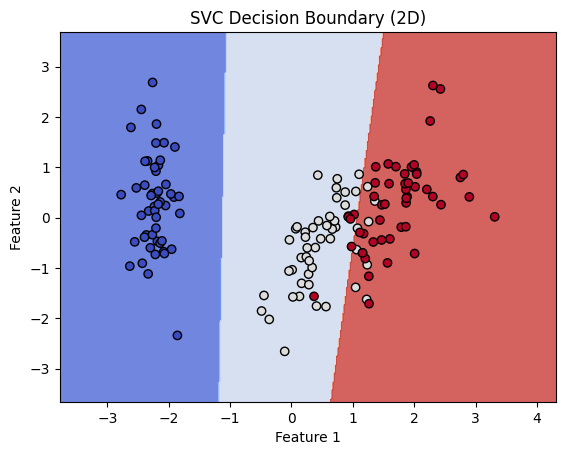

In [2]:
# 2D Plot
def plot_svc_2d(X, y, model):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVC Decision Boundary (2D)')
    plt.show()

# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Train SVC on PCA-reduced data
svc_2d = SVC(kernel='linear')
svc_2d.fit(X_pca, y)

# Plot 2D decision boundary
plot_svc_2d(X_pca, y, svc_2d)

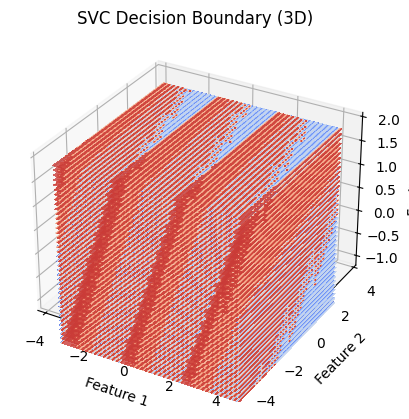

In [3]:
# 3D Plot
def plot_svc_3d(X, y, model):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    z_min, z_max = X[:, 2].min() - 1, X[:, 2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    zz = np.array([model.predict(np.c_[xx.ravel(), yy.ravel(), np.full_like(xx.ravel(), z)])
                   for z in np.arange(z_min, z_max, 0.1)])
    Z = zz.reshape(xx.shape[0], xx.shape[1], -1)

    for i in range(Z.shape[2]):
        ax.contourf(xx, yy, Z[:, :, i], zdir='z', offset=np.arange(z_min, z_max, 0.1)[i], alpha=0.8, cmap=plt.cm.coolwarm)

    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title('SVC Decision Boundary (3D)')
    plt.show()

# Reduce to 3D using PCA
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# Train SVC on PCA-reduced data
svc_3d = SVC(kernel='linear')
svc_3d.fit(X_pca_3d, y)

# Plot 3D decision boundary
plot_svc_3d(X_pca_3d, y, svc_3d)